In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df=pd.read_csv("C:/Users/HP/OneDrive/Talent/ProjectChallenge/Week 3/spam.csv",encoding="latin-1")

In [5]:
#visualizing dataset
df.head(n=10)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#To check whether target attribute is binary or not
np.unique(df['class'])

array(['ham', 'spam'], dtype=object)

In [9]:
np.unique(df['message'])

array([' &lt;#&gt;  in mca. But not conform.',
       ' &lt;#&gt;  mins but i had to stop somewhere first.',
       ' &lt;DECIMAL&gt; m but its not a common car here so its better to buy from china or asia. Or if i find it less expensive. I.ll holla',
       ..., 'ÌÏ thk of wat to eat tonight.', 'ÌÏ v ma fan...',
       'ÌÏ wait 4 me in sch i finish ard 5..'], dtype=object)

In [12]:
#Creating sparse matrix
x=df["message"].values
y=df["class"].values

#create count vectorize object
cv=CountVectorizer()
x=cv.fit_transform(x)
v=x.toarray()
print(v)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
first_col=df.pop('message')
df.insert(0,'message',first_col)
df

KeyError: 'message'

In [19]:
#splitting train+test 3:1
train_x=x[:4180]
train_y=y[:4180]

test_x=x[4180:]
test_y=y[4180:]

In [21]:
bnb=BernoulliNB(binarize=0.0)
model=bnb.fit(train_x,train_y)

y_pred_train=bnb.predict(train_x)
y_pred_test=bnb.predict(test_x)

In [22]:
#training score
print(bnb.score(train_x,train_y)*100)

#testing score
print(bnb.score(test_x,test_y)*100)

98.70813397129187
98.20402298850574


In [24]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_pred_train))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      3615
        spam       0.99      0.91      0.95       565

    accuracy                           0.99      4180
   macro avg       0.99      0.95      0.97      4180
weighted avg       0.99      0.99      0.99      4180



In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred_test))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1210
        spam       0.99      0.87      0.93       182

    accuracy                           0.98      1392
   macro avg       0.99      0.93      0.96      1392
weighted avg       0.98      0.98      0.98      1392



In [2]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("C:/Users/HP/OneDrive/Talent/ProjectChallenge/Week 3/stress.csv")

In [5]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [6]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [7]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [8]:
import nltk
import re
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
stopword=set (stopwords.words('english'))

ModuleNotFoundError: No module named 'nltk'

In [9]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 KB 2.8 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 KB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 KB 4.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
import nltk
import re
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
stopword=set (stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
def clean(text):
    text = str(text) . lower()  #returns a string where all characters are lower case. Symbols and Numbers are ignored.
    text = re. sub('\[.*?\]',' ',text)  #substring and returns a string with replaced values.
    text = re. sub('https?://\S+/www\. \S+', ' ', text)#whitespace char with pattern
    text = re. sub('<. *?>+', ' ', text)#special char enclosed in square brackets
    text = re. sub(' [%s]' % re. escape(string. punctuation), ' ', text)#eliminate punctuation from string
    text = re. sub(' \n',' ', text)
    text = re. sub(' \w*\d\w*' ,' ', text)#word character ASCII punctuation
    text = [word for word in text. split(' ') if word not in stopword]  #removing stopwords
    text =" ". join(text)
    text = [stemmer . stem(word) for word in text. split(' ') ]#remove morphological affixes from words
    text = " ". join(text)
    return text
df [ "text"] = df["text"]. apply(clean)

In [13]:
import matplotlib. pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ". join(i for i in df. text)
stopwords = set (STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords,background_color="white") . generate(text)
plt. figure(figsize=(10, 10) )
plt. imshow(wordcloud )
plt. axis("off")
plt. show( )

ModuleNotFoundError: No module named 'wordcloud'

In [16]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 KB 2.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


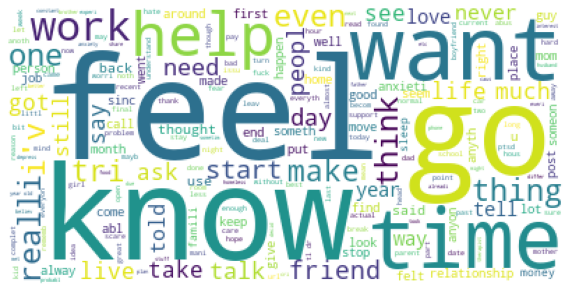

In [17]:
import matplotlib. pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ". join(i for i in df. text)
stopwords = set (STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords,background_color="white") . generate(text)
plt. figure(figsize=(10, 10) )
plt. imshow(wordcloud )
plt. axis("off")
plt. show( )

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [19]:
x=np.array(df["text"])
y=np.array(df["label"])

In [20]:
cv=CountVectorizer()
X=cv.fit_transform(x)
print(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33)

  (0, 7405)	1
  (0, 3278)	1
  (0, 9454)	1
  (0, 861)	1
  (0, 8359)	1
  (0, 3750)	1
  (0, 7214)	1
  (0, 8908)	1
  (0, 298)	1
  (0, 9749)	1
  (0, 4303)	1
  (0, 5034)	1
  (0, 5325)	1
  (0, 2188)	1
  (0, 5118)	1
  (0, 3265)	1
  (0, 2593)	3
  (0, 4188)	1
  (0, 5316)	1
  (0, 3697)	1
  (0, 8339)	1
  (0, 6861)	1
  (0, 4150)	1
  (0, 5174)	1
  (0, 1831)	1
  :	:
  (2836, 877)	1
  (2836, 4555)	1
  (2836, 2928)	1
  (2836, 4615)	1
  (2836, 4785)	1
  (2836, 4511)	1
  (2837, 7405)	2
  (2837, 3018)	1
  (2837, 5533)	2
  (2837, 8784)	1
  (2837, 8502)	1
  (2837, 6770)	1
  (2837, 4318)	1
  (2837, 9670)	1
  (2837, 5569)	1
  (2837, 8881)	1
  (2837, 5713)	1
  (2837, 2587)	1
  (2837, 7468)	1
  (2837, 2351)	1
  (2837, 7804)	1
  (2837, 2758)	1
  (2837, 8880)	1
  (2837, 5459)	1
  (2837, 3020)	1


In [21]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(xtrain,ytrain)

BernoulliNB()

In [24]:
user=input("Enter the text")
data=cv.transform([user]).toarray()
output=model.predict(data)
print(output)

Enter the textI'm stuck between trying to live my life,and trying to run from it.
[1]
